https://www.youtube.com/watch?v=uMlU2JaiOd8&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH

When building a machine learning model in real-life, it’s almost rare that all the variables in the dataset are useful to build a model. Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier. Furthermore adding more and more variables to a model increases the overall complexity of the model.

As per the Law of Parsimony of ‘Occam’s Razor’, the best explanation to a problem is that which involves the fewest possible assumptions. Thus, feature selection becomes an indispensable part of building machine learning models.


The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.

### Feature Selection Methods:

1. Filter methods

2. Wrapper methods

3. Embedded methods

4. Hybrid methods

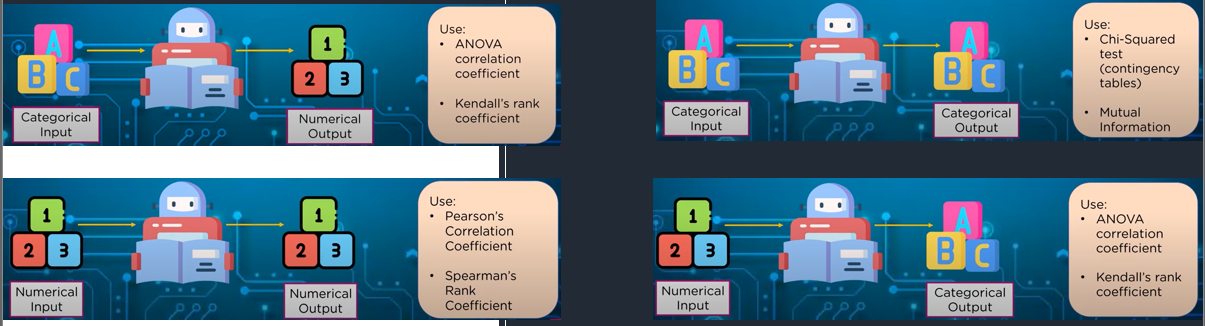

### SelectKBest -
<br > Feature - Cat,     Target - Cat ==> Chi-Square <br /> 
<br > Feature - Numeric, Target - Numeric ==> Correlation <br /> 
<br > Feature - Cat,     Target - Numeric ==> f_regression <br /> 
<br > Feature - Numeric, Target - Cat ==> f_classification <br /> 

## 1. Filter Methods : 

Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

In this method features are based on their relation to the output, or how they are correlating to the output.

- __A. Information Gain :__

The information gained in the decision tree can be defined as the amount of information improved in the nodes before splitting them for making further decisions.


Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

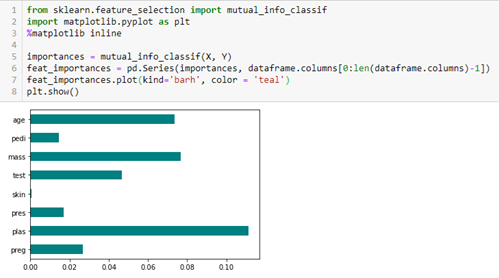

- __B. Chi-Square Test :__


The Chi-square test is used for __categorical features in a dataset__. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. 

In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: 
    
    the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.
    

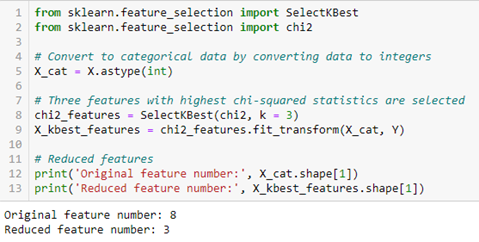

- __C. Fisher's Score :__

Fisher’s score function is deeply related to maximum likelihood estimation.

Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

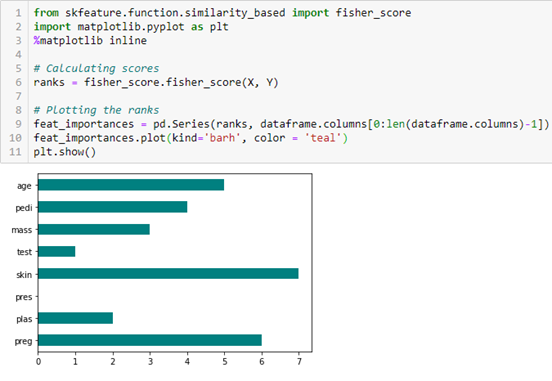

- __D. Correlation Coefficient :__

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.


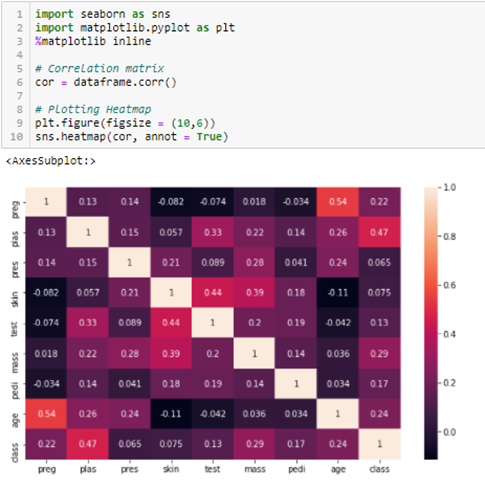

We need to set an absolute value, say 0.5 as the threshold for selecting the variables. If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable. We can also compute multiple correlation coefficients to check whether more than two variables are correlated to each other. This phenomenon is known as multicollinearity.

- __E. Variance Threshold :__

The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

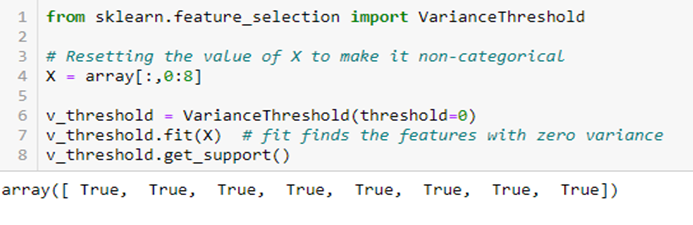


The get_support returns a Boolean vector where True means that the variable does not have zero variance.

- __F. Mean Absolute Difference (MAD) :__

‘The mean absolute difference (MAD) computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scale variant.’ This means that higher the MAD, higher the discriminatory power.

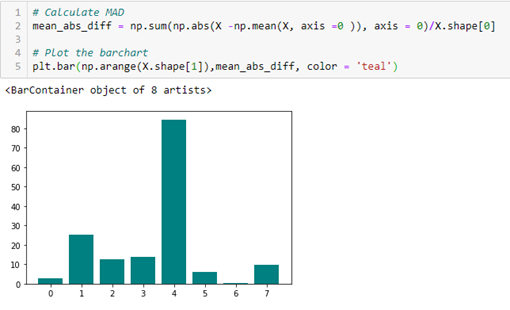

- __G. Dispersion ratio :__

‘Another measure of dispersion applies the arithmetic mean (AM) and the geometric mean (GM). For a given (positive) feature Xi on n patterns, the AM and GM are given by

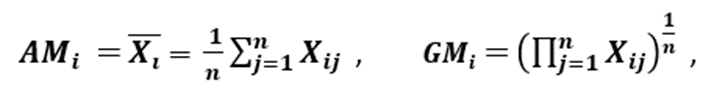

respectively; since AMi ≥ GMi, with equality holding if and only if Xi1 = Xi2 = …. = Xin, then the ratio

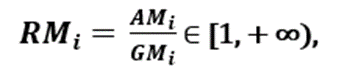


can be used as a dispersion measure. Higher dispersion implies a higher value of Ri, thus a more relevant feature. Conversely, when all the feature samples have (roughly) the same value, Ri is close to 1, indicating a low relevance feature.’ [1]

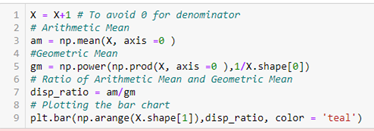

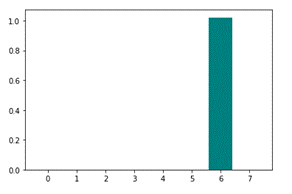

## 2. Wrapper Method

Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.


We split our data inro subsets and train a model using this. Based on the output of the model, we add and subtract features and train the model again.

- __A. Forward Feature Selection :__

This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

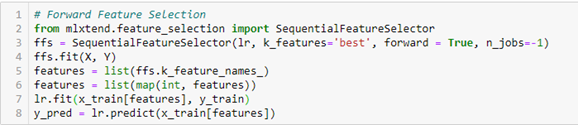

- __B. Backward Feature Elimination :__

This method works exactly opposite to the Forward Feature Selection method. Here, we start with all the features available and build a model. Next, we the variable from the model which gives the best evaluation measure value. This process is continued until the preset criterion is achieved.


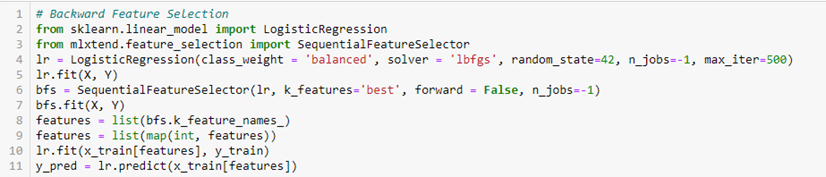

This method along with the one discussed above is also known as the Sequential Feature Selection method.

- __C. Exhaustive Feature Selection :__

This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.


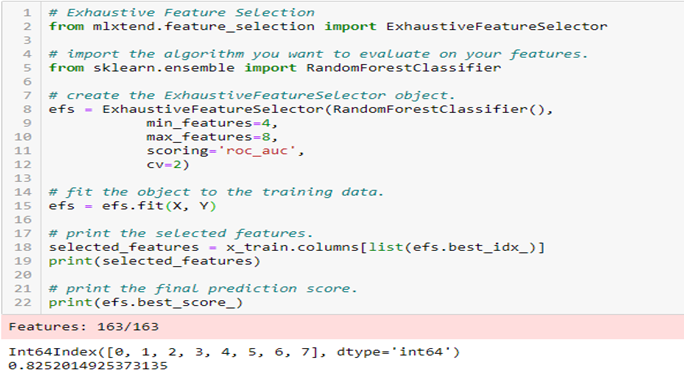

- __D. Recursive Feature Elimination :__

‘Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.


Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.’

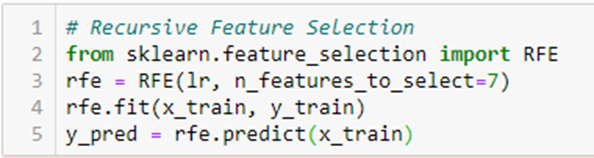

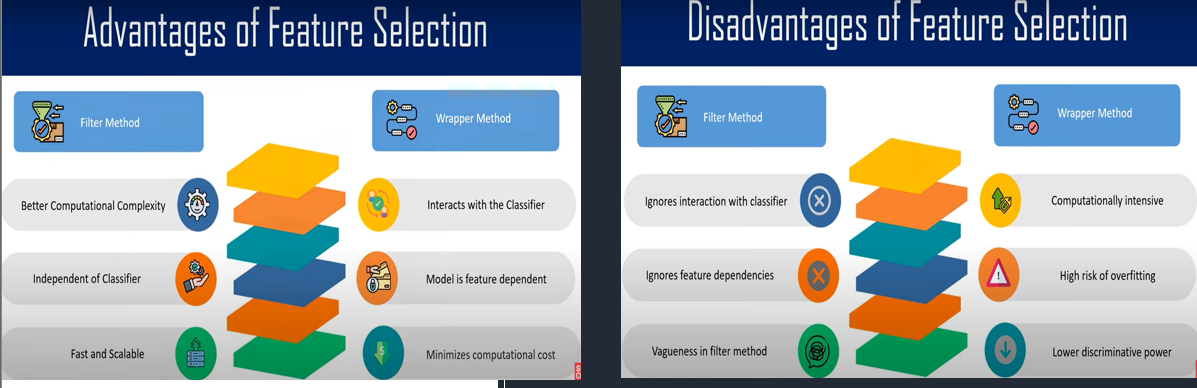

## 3. Embedded Methods / Intrinsic Method :

These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

Model will check accuracy of different subsets and select the best among them.

- __A. LASSO Regularization (L1) :__

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.


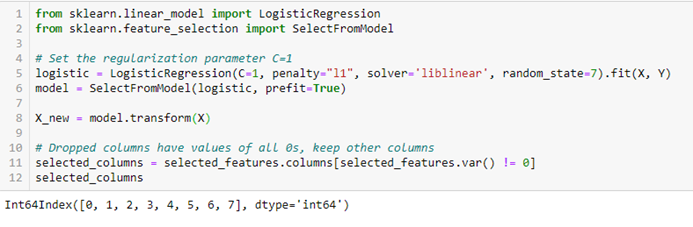

- __B. Random Forest Importance :__

Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

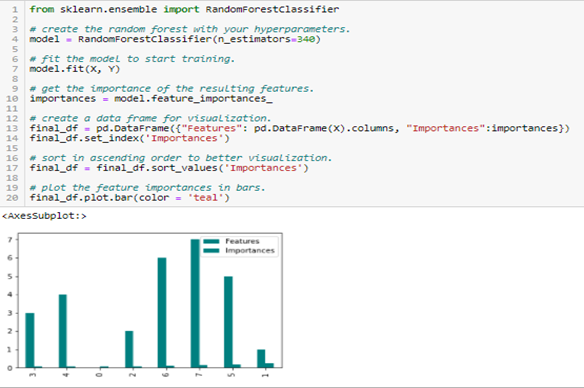

Feature extraction techniques like Principal Component Analysis, Singular Value Decomposition, Linear Discriminant Analysis, etc. These methods help to reduce the dimensionality of the data or reduce the number of variables while preserving the variance of the data.

____
____
____

# 1. Feature Selection - Dropping Constant Features - variance

In this step we will be removing the features which have constant features which are actually not important
for solving the problem statement

In [1]:
# Import pandas to create DataFrame 
import pandas as pd 
  
# Make DataFrame of the given data 
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]}) 

In [2]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


In [3]:
data.mean()

# mean for C and D is 0

A    2.333333
B    6.500000
C    0.000000
D    1.000000
dtype: float64

In [4]:
data.std()
# std dev for C and D is also 0

A    1.366260
B    1.870829
C    0.000000
D    0.000000
dtype: float64

In [5]:
data.var()

A    1.866667
B    3.500000
C    0.000000
D    0.000000
dtype: float64

Variance of column C is 0 as all the values are 0 and Variance of column D is 0 as all the values are 1

### Variance Threshold :
Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [6]:
### It will remove zero variance features as threshold is 0

from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [7]:
var_thres.get_support() # the column which are dropped will be False

array([ True,  True, False, False])

In [8]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [9]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]] # so C and D will be selected

print(len(constant_columns),constant_columns)


2 ['C', 'D']


In [10]:
for feature in constant_columns:
     print(feature)

C
D


In [11]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


In [12]:
# same result, different code
data[[column for column in data.columns[var_thres.get_support()]]]

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


#### Lets practise on bigger dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [13]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [14]:
df=pd.read_csv('santander.csv',nrows=10000)

In [15]:
df.shape

(10000, 371)

In [16]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [17]:
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

In [18]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 370), (3000, 370))

#### Lets apply the variance threshold

In [19]:
X_train_var = pd.DataFrame(X_train.var(),columns=['var'])
X_train_var['name'] = X_train.var().index
X_train_var.sort_values(['var'],ascending=False,inplace=True)
X_train_var.head()

,var,name
delta_imp_aport_var13_1y3,4.692732e+17,delta_imp_aport_var13_1y3
delta_num_aport_var13_1y3,4.692732e+17,delta_num_aport_var13_1y3
delta_imp_compra_var44_1y3,9.991427e+16,delta_imp_compra_var44_1y3
delta_num_compra_var44_1y3,9.991427e+16,delta_num_compra_var44_1y3
delta_imp_aport_var17_1y3,7.138775e+16,delta_imp_aport_var17_1y3


In [20]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [21]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [22]:
### Finding non constant features
sum(var_thres.get_support())

284

In [23]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])

284

In [24]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print("number of constant features: ", len(constant_columns))

number of constant features:  86


In [25]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [26]:
new_X_train = X_train.drop(constant_columns,axis=1)
new_X_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15


In [27]:
new_X_train.shape

(7000, 284)

In [28]:
X_train.shape

(7000, 370)

After getting removed we have 284 columns left

___

# 2. Feature Selection- With Correlation (Pearson-Correlation)
In this step we will be removing the features which are highly correlated to one another

In [29]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [31]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [38]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


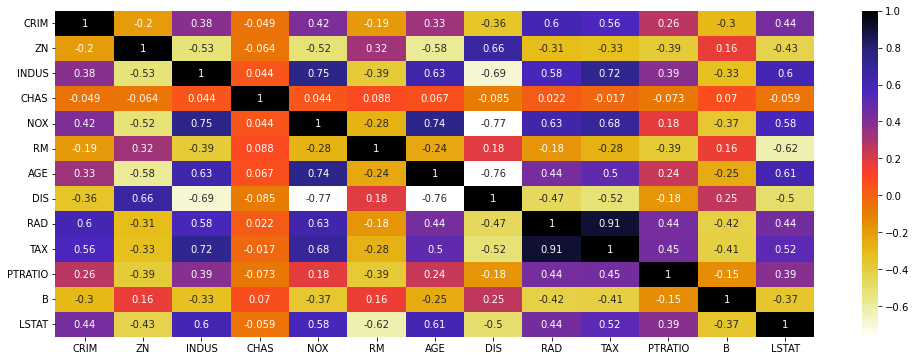

In [39]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(17,6))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [40]:
# with the following function we can select highly correlated features 
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # columns greater than threshold
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [41]:
corr_features = correlation(X_train, 0.9) # threshold is 90%
len(set(corr_features))

1

In [42]:
corr_features

{'TAX'}

In [43]:
corr_features = correlation(X_train, 0.7) # threshold is 70%
len(set(corr_features))

3

In [44]:
corr_features

{'AGE', 'NOX', 'TAX'}

___

###### my code

In [45]:
def correlation1(dataset, threshold):
    col_corr = [] # Set of all the names of correlated columns
    col1= []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                #print(corr_matrix.iloc[i, j])
                colname = corr_matrix.columns[i]# getting the name of column
                col1.append(colname)
                colwith = corr_matrix.columns[j]
                
                col1.append(colwith)
                col1.append(corr_matrix.iloc[i, j])
                col_corr.extend(col1)
                col1.clear()
    return col_corr

In [46]:
corr_features1 = correlation1(X_train, 0.9) # threshold is 70%
len(corr_features)

3

In [47]:
corr_features1

['TAX', 'RAD', 0.9074547925869876]

In [48]:
corr_features1 = correlation1(X_train, 0.7) # threshold is 70%
len(set(corr_features))

3

In [49]:
corr_features1

['NOX',
 'INDUS',
 0.7502182800989485,
 'AGE',
 'NOX',
 0.7400518478225784,
 'TAX',
 'INDUS',
 0.7190379636184855,
 'TAX',
 'RAD',
 0.9074547925869876]

##### end of mycode

___

In [50]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,5.2146,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,1.1691,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,3.3633,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,1.7028,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0141,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,6.0622,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,1.9356,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,1.4261,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,3.3175,4.0,18.4,396.90,4.54


#### Let try with Big Dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [51]:
df=pd.read_csv('santander.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
corrmat = X_train.corr()

In [54]:
corrmat

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,0.003868,-0.007921,0.026313,0.010195,0.003226,-0.001037,-0.008416,0.009563,0.001776,...,-0.016729,-0.015758,-0.010380,-0.013348,-0.012468,-0.004889,0.008355,-0.010153,-0.007876,-0.003619
var3,0.003868,1.000000,-0.009840,0.000892,0.004527,0.004604,0.000984,0.001146,0.000417,0.000477,...,0.000247,0.000412,0.000428,0.000433,0.000452,0.000570,0.000337,0.000671,0.000669,-0.000065
var15,-0.007921,-0.009840,1.000000,0.033884,0.117646,0.124938,0.059411,0.074257,0.018217,0.019172,...,0.019788,0.026903,0.024832,0.027281,0.027676,0.022812,0.031673,0.024141,0.023195,-0.005522
imp_ent_var16_ult1,0.026313,0.000892,0.033884,1.000000,0.017469,0.015492,0.010331,0.007650,-0.000866,-0.000991,...,0.037854,-0.000822,-0.000812,-0.000867,-0.000899,-0.001184,-0.000700,-0.001394,-0.001391,0.001352
imp_op_var39_comer_ult1,0.010195,0.004527,0.117646,0.017469,1.000000,0.877170,0.506263,0.455786,0.052864,0.068169,...,0.016903,0.017639,0.044972,0.024841,0.032876,-0.001352,-0.003516,0.000278,0.000051,0.006273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.004889,0.000570,0.022812,-0.001184,-0.001352,0.001320,-0.001268,-0.001421,-0.000555,-0.000636,...,-0.000329,-0.000527,-0.000521,-0.000556,-0.000576,1.000000,0.617695,0.920544,0.933605,0.000002
saldo_medio_var44_hace3,0.008355,0.000337,0.031673,-0.000700,-0.003516,0.000460,-0.000750,-0.000840,-0.000328,-0.000376,...,-0.000195,-0.000312,-0.000308,-0.000329,-0.000341,0.617695,1.000000,0.521398,0.474861,-0.004989
saldo_medio_var44_ult1,-0.010153,0.000671,0.024141,-0.001394,0.000278,0.000916,-0.001492,-0.001672,-0.000654,-0.000748,...,-0.000388,-0.000621,-0.000613,-0.000655,-0.000679,0.920544,0.521398,1.000000,0.983012,-0.000798
saldo_medio_var44_ult3,-0.007876,0.000669,0.023195,-0.001391,0.000051,0.000364,-0.001489,-0.001669,-0.000652,-0.000747,...,-0.000387,-0.000620,-0.000612,-0.000653,-0.000677,0.933605,0.474861,0.983012,1.000000,0.000160


#Using Pearson Correlation
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corrmat,cbar=False,cmap=plt.cm.CMRmap_r)

<AxesSubplot:>

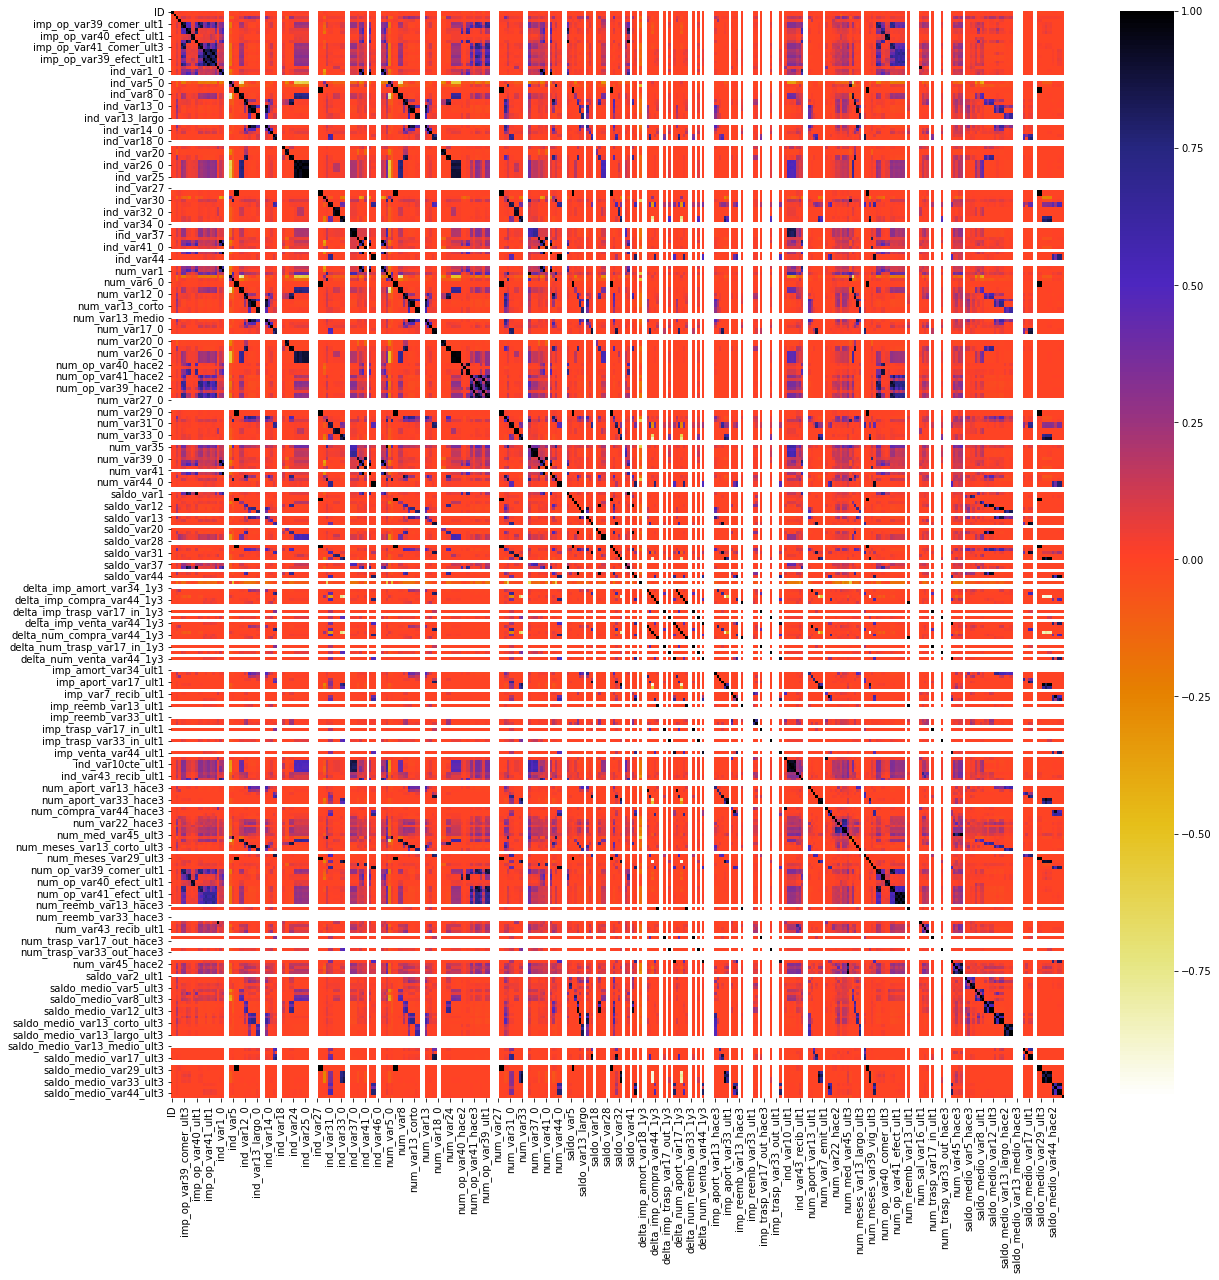

In [55]:
#Using Pearson Correlation
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corrmat,cmap=plt.cm.CMRmap_r)

In [56]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

155

In [57]:
corr_features

{'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_ult1',
 'num_aport_var17

In [58]:
X_train.shape

(7000, 370)

In [59]:
X_train.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15


In [60]:
X_train.drop(corr_features,axis=1).shape

(7000, 215)

In [61]:
X_train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=370)

___
___

# 3. Feature Selection-Information gain - mutual information In Classification 

#### Mutual Information 

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

#### Youtube Videos

Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0
        
Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA
        
Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

In [62]:
import pandas as pd

In [63]:
df=pd.read_csv('wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [64]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [66]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [67]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


##### class for MUTUAL INFORMATION: mutual_info_classif

In [68]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.42484107, 0.30745214, 0.16883495, 0.25936705, 0.20260614,
       0.47162737, 0.71422015, 0.10697396, 0.26639023, 0.62873951,
       0.54605412, 0.54692613, 0.52789466])

#### Note: Value will always lie between [0,1] after applying Mutual_info_classif

Higer Value means it is the best feature to keep ie. it's dependency on __Target variable__ is too much

In [69]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.714220
Color.int               0.628740
OD                      0.546926
Hue                     0.546054
Proline                 0.527895
Phenols                 0.471627
Alcohol                 0.424841
Malic.acid              0.307452
Proanth                 0.266390
Acl                     0.259367
Mg                      0.202606
Ash                     0.168835
Nonflavanoid.phenols    0.106974
dtype: float64

<AxesSubplot:>

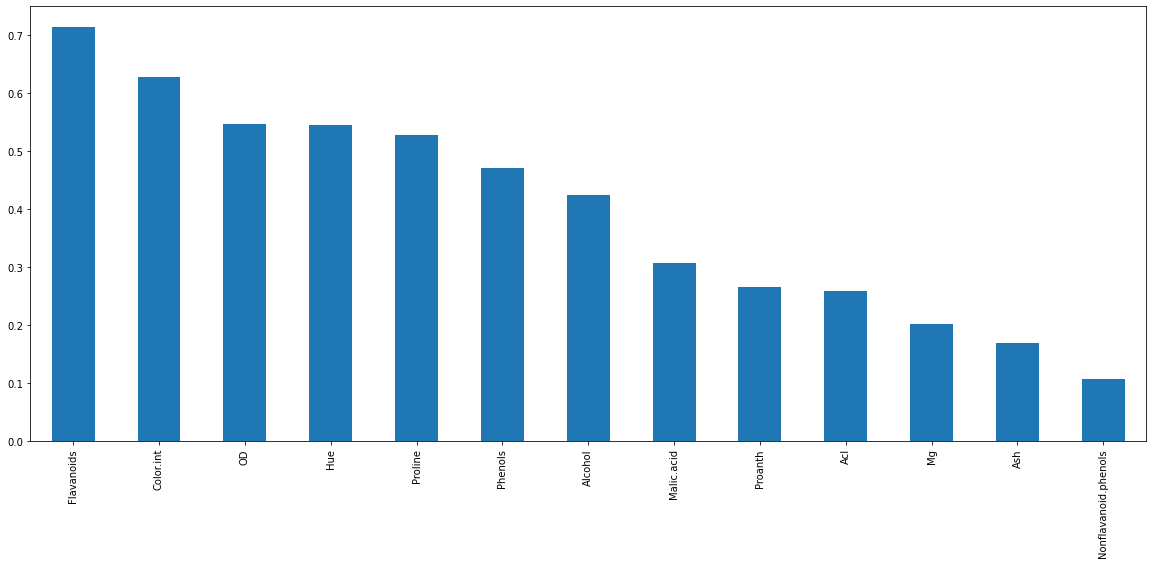

In [70]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [71]:
from sklearn.feature_selection import SelectKBest

In [72]:
# Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()] # get support give index names

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

#### Difference Between Information Gain And Mutual Information
$Mutual\;Information\;\longrightarrow\;$ I(X ; Y) = H(X) – H(X | Y) 

and

$Information\;gain\longrightarrow\;$ IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for 
information gain. Technically, they calculate the same quantity
if applied to the same data.

## Comparion of Univariate And Mutual Information
Comparison of F-test and mutual information
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

___
___
___

## 4. Feature Selection-Information gain - mutual information In Regression Problem Statements

#### Mutual Information 
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances 

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

#### Youtube Videos

Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0
        
Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA
        
Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

https://www.youtube.com/watch?v=YrhlQB3mQFI

In [73]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
import pandas as pd
housing_df=pd.read_csv('house-train.csv')

In [74]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
housing_df.shape

(1460, 81)

In [76]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [77]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [78]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [79]:
housing_df= housing_df[numerical_cols]

In [80]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [81]:
housing_df=housing_df.drop("Id",axis=1)

In [82]:
### It is always a good practice to split train and test data to avoid
# overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [83]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [84]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [85]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.26108136, 0.20955741, 0.16483019, 0.51575482, 0.11416938,
       0.35139076, 0.24737995, 0.10151188, 0.15598062, 0.        ,
       0.11166573, 0.38388589, 0.31187804, 0.23919615, 0.00479718,
       0.47985171, 0.01546088, 0.        , 0.26077834, 0.07602527,
       0.03273201, 0.01101505, 0.18509952, 0.17639413, 0.26551472,
       0.36048288, 0.36867609, 0.06855319, 0.17532048, 0.00543231,
       0.        , 0.03156208, 0.00450698, 0.00230763, 0.        ,
       0.01674416])

In [86]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.515755
GrLivArea        0.479852
TotalBsmtSF      0.383886
GarageArea       0.368676
GarageCars       0.360483
YearBuilt        0.351391
1stFlrSF         0.311878
GarageYrBlt      0.265515
MSSubClass       0.261081
FullBath         0.260778
YearRemodAdd     0.247380
2ndFlrSF         0.239196
LotFrontage      0.209557
TotRmsAbvGrd     0.185100
Fireplaces       0.176394
OpenPorchSF      0.175320
LotArea          0.164830
BsmtFinSF1       0.155981
OverallCond      0.114169
BsmtUnfSF        0.111666
MasVnrArea       0.101512
HalfBath         0.076025
WoodDeckSF       0.068553
BedroomAbvGr     0.032732
ScreenPorch      0.031562
YrSold           0.016744
BsmtFullBath     0.015461
KitchenAbvGr     0.011015
EnclosedPorch    0.005432
LowQualFinSF     0.004797
PoolArea         0.004507
MiscVal          0.002308
BsmtFinSF2       0.000000
BsmtHalfBath     0.000000
3SsnPorch        0.000000
MoSold           0.000000
dtype: float64

OverallQual is most dependent feature on "Target" by 55%

<AxesSubplot:>

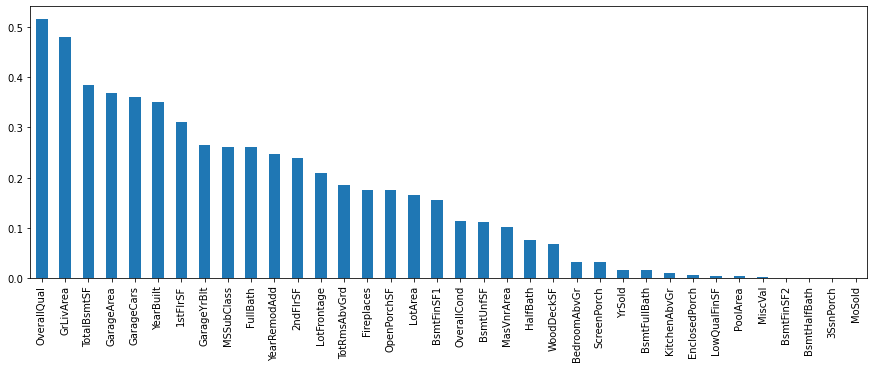

In [87]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [88]:
from sklearn.feature_selection import SelectPercentile

In [89]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000002B1D11018B0>)

In [90]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [91]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

#### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y)
and
IG(S, a) = H(S) – H(S | a)


As such, mutual information is sometimes used as a synonym for 
information gain. Technically, they calculate the same quantity
if applied to the same data.

___
___
___

### Fisher Score- Chisquare  Test For Feature Selection

Compute chi-squared stats between each non-negative feature and class.

- This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.
The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

#### Youtube Videos

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

All About P Value,T test,Chi Square Test, Anova Test : https://www.youtube.com/watch?v=YrhlQB3mQFI

In [92]:
import seaborn as sns
df=sns.load_dataset('titanic')
import numpy as np

In [93]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [95]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [96]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [97]:
### Let's perform label encoding on sex column
import numpy as np
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [98]:
ordinal_label

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [99]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [100]:
### let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)

In [101]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [102]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [103]:
X_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [104]:
X_train['sex'].unique()

array([1, 0])

In [105]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [106]:
## Perform chi2 test
### chi2 returns 2 values : Fscore and the pvalue

from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [107]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [108]:
f_p_values[0] # F-score

array([65.67929505,  7.55053653, 10.88471585, 21.97994154])

In [109]:
f_p_values[1] # p-values

array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06])

In [110]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [111]:
p_values.sort_values(ascending=False)

embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
sex         5.306038e-16
dtype: float64

### Observation 
Embarked is the most important column when compared to the output feature
Survived

___
***
___

## Feature selection Live class (Not imp except SelectKBest)

https://www.youtube.com/watch?v=k-EpAMjw6AE&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=6

#### Feature Selection Techniques

In [112]:
import pandas as pd
df=pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### Univariate Selection

In [113]:

X=df.iloc[:,:-1]
y=df['price_range']

In [114]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [115]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [117]:
df.shape

(2000, 21)

In [118]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [119]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [120]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [121]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [122]:
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


##### Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [123]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [124]:
print(model.feature_importances_)

[0.06044838 0.01950481 0.03486414 0.01948393 0.03362406 0.01774576
 0.03607816 0.03364797 0.03675044 0.03338148 0.03415711 0.04558702
 0.04917846 0.38680316 0.03507166 0.03513873 0.03459668 0.01404165
 0.01980237 0.02009404]


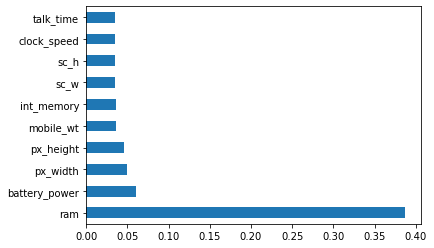

In [125]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

#### Correlation

In [126]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

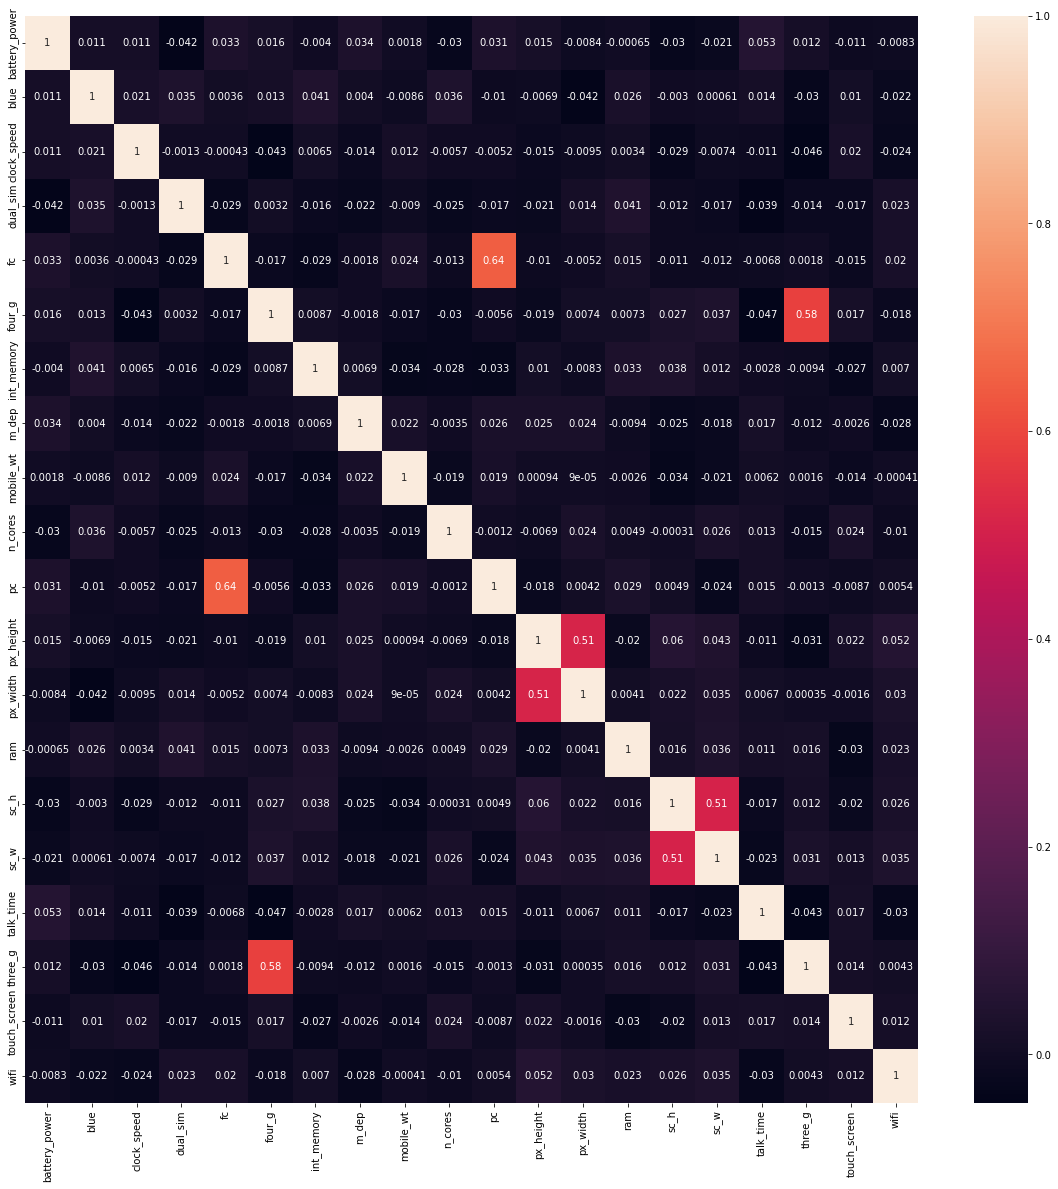

In [127]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)


In [128]:
#### Remove The correlated

In [129]:
threshold=0.8

In [130]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [131]:
correlation(df.iloc[:,:-1],threshold)

set()

#### Information Gain

In [132]:
from sklearn.feature_selection import mutual_info_classif

In [133]:
mutual_info=mutual_info_classif(X,y)

In [134]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)


ram              0.844169
px_width         0.032001
battery_power    0.030299
px_height        0.027809
touch_screen     0.021853
mobile_wt        0.016737
fc               0.013139
int_memory       0.010956
four_g           0.010806
clock_speed      0.008419
sc_h             0.006078
sc_w             0.001814
three_g          0.000000
talk_time        0.000000
pc               0.000000
blue             0.000000
n_cores          0.000000
m_dep            0.000000
dual_sim         0.000000
wifi             0.000000
dtype: float64

___
___
___